In [93]:
from IPython.display import HTML

In [94]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">TOGGLE CODE ON/OFF</a>.''')


# Illustration of posterior over C

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt  # plt.rcdefaults()
%matplotlib inline
import numpy as np
import scipy.stats as sp

In [2]:
def g(mean=.5, var_dmilli=100):
    ub = mean * (1-mean)
    if var_dmilli/10000 >= ub:
        var_dmilli = (ub - .01)*10000
    return np.array([mean, var_dmilli])
ww = interactive(g, mean=(.01,.99,0.01), var_dmilli=(1,500, 10))
display(ww)

interactive(children=(FloatSlider(value=0.5, description='mean', max=0.99, min=0.01, step=0.01), IntSlider(val…

alpha: 2.61, beta: 2.13


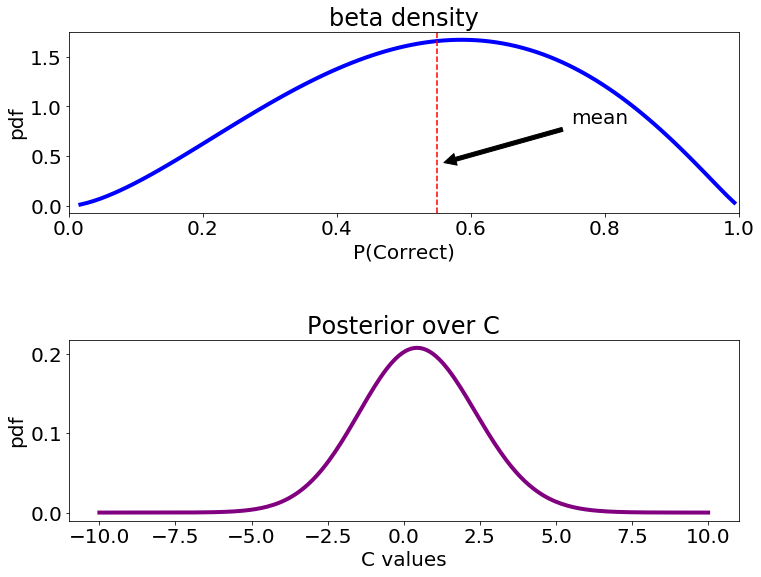

In [6]:
m, v = ww.result
v = v/10000
samplesize = m*(1-m)/v - 1
assert samplesize > 0, f'{samplesize}'

bbeta = (1-m)*samplesize
alpha = m * samplesize

print(f'alpha: {alpha:.2f}, beta: {bbeta:.2f}')

x = np.linspace(sp.beta.ppf(0.0001, alpha, bbeta),sp.beta.ppf(0.9999, alpha, bbeta), 100)

fig, axes = plt.subplots(2, figsize=(12,9),gridspec_kw={'hspace': .7})
plt.rcParams.update({'font.size': 20})

ax1=axes[0]
y = sp.beta.pdf(x, alpha, bbeta)
ax1.plot(x, y,'b-', lw=4, label='beta pdf')
ax1.axvline(x=m, color='red', linestyle='--')
ax1.set_xlim(0,1)
xlim = ax1.get_xlim()
ax1.annotate('mean', xy=(m, .25*y.max()), xytext=(.75*xlim[1], .5*y.max()),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax1.set_title('beta density')
ax1.set_xlabel('P(Correct)')
ax1.set_ylabel('pdf');


ax2=axes[1]
def cdensity(x, t):
    return np.sqrt(t)*sp.norm.pdf(x*np.sqrt(t)) * sp.beta.pdf(sp.norm.cdf(x*np.sqrt(t)), alpha, bbeta)
time = .1
cvals = np.linspace(-10,10, 200)
ycvals = cdensity(cvals, time)
ax2.plot(cvals, ycvals, color='purple', linewidth=4)
ax2.set_title('Posterior over C')
ax2.set_xlabel('C values')
ax2.set_ylabel('pdf');

# 